In [50]:
!python tools/train.py {'projects/fruit30/resnet50_finetune.py'}

##### 训练的配置文件在mmpretrain/projects/fruit30中
##### 日志结果与权重结果保存在mmpretrain/work_dirs/resnet50_finetune中
##### 训练数据集在mmpretrain/data/fruit30中,事先准备好了测试集test_set和训练集training_set
##### 预测图片在mmpretrain/data/predict中
##### 采取的预测权重通过模型轻量化转换保存到checkpoint文件夹中（权重文件太大无法上传到GitHub上）

#### 测试

In [23]:
!python tools/test.py {'projects/fruit30/resnet50_finetune.py'} {'work_dirs/resnet50_finetune/epoch_102.pth'}

06/08 09:47:18 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 1928934573
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.30.30706 版
    GCC: n/a
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,cod

#### 训练日志可视化

In [45]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [46]:
# 日志文件路径
log_path = 'work_dirs/resnet50_finetune/20230607_211243/vis_data/scalars.json'

In [47]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [48]:
len(json_list)

220

In [49]:
eval(json_list[4])

{'lr': 0.2,
 'data_time': 0.0010865449905395508,
 'loss': 3.369353675842285,
 'time': 0.28563201427459717,
 'epoch': 5,
 'memory': 4288,
 'step': 576}

In [50]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 1125.46it/s]


In [51]:
df_train

,data_time,epoch,loss,lr,memory,step,time,accuracy/top1,accuracy/top5
0,0.000904,1.0,3.418253,0.2000,4288.0,100.0,0.286738,NaN,NaN
1,0.000701,2.0,3.412083,0.2000,4288.0,219.0,0.283442,NaN,NaN
2,0.000994,3.0,3.405863,0.2000,4288.0,338.0,0.285040,NaN,NaN
3,0.000600,4.0,3.410316,0.2000,4288.0,457.0,0.284725,NaN,NaN
4,0.001087,5.0,3.369354,0.2000,4288.0,576.0,0.285632,NaN,NaN
...,...,...,...,...,...,...,...,...,...
215,0.000807,197.0,2.267027,0.0002,4288.0,23424.0,0.285334,NaN,NaN
216,0.001001,198.0,2.283036,0.0002,4288.0,23543.0,0.285644,NaN,NaN
217,0.000897,199.0,2.277575,0.0002,4288.0,23662.0,0.285342,NaN,NaN
218,0.000393,200.0,2.371449,0.0002,4288.0,23781.0,0.285040,NaN,NaN


In [52]:
df_test

""


In [53]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

In [59]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [60]:
df_train.columns

Index(['data_time', 'epoch', 'loss', 'lr', 'memory', 'step', 'time',
       'accuracy/top1', 'accuracy/top5'],
      dtype='object')

In [61]:
metrics = ['loss']

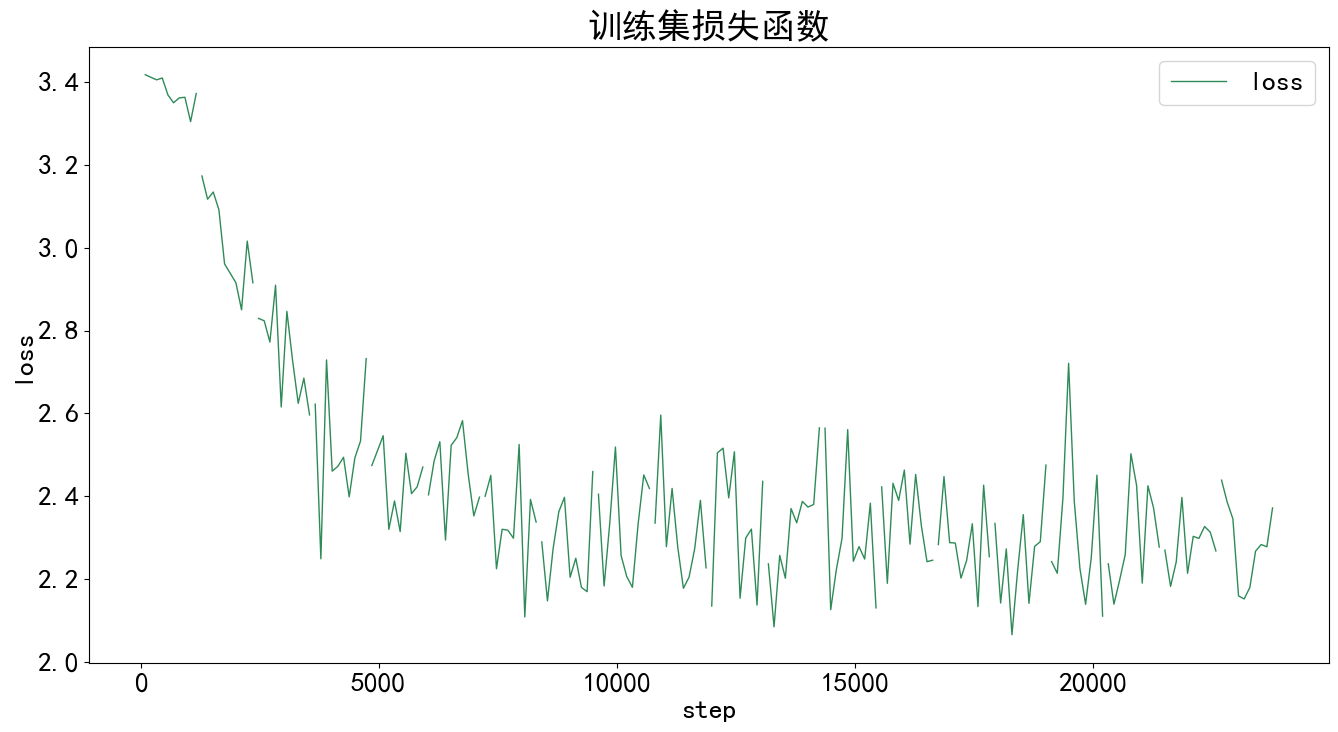

In [62]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 模型轻量化转换

In [82]:
!python tools/model_converters/publish_model.py \
        work_dirs/resnet50_finetune/epoch_102.pth \
        checkpoint/resnet50_finetune_epoch_200_20230608.pth

Successfully generated the publish-ckpt as checkpoint/resnet50_finetune_epoch_200_20230608_20230608-3b6d0f5c.pth.


#### 在给定图像上进行推理

In [83]:
from mmpretrain import ImageClassificationInferencer

In [84]:
#inferencer = ImageClassificationInferencer('projects/fruit30/resnet50_finetune.py',pretrained='work_dirs/resnet50_finetune/epoch_102.pth')
inferencer = ImageClassificationInferencer('projects/fruit30/resnet50_finetune.py',pretrained='checkpoint/resnet50_finetune_epoch_200_20230608_20230608-3b6d0f5c.pth')

06/08 19:33:18 - mmengine - INFO - Because batch augmentations are enabled, the data preprocessor automatically enables the `to_onehot` option to generate one-hot format labels.
Loads checkpoint by local backend from path: checkpoint/resnet50_finetune_epoch_200_20230608_20230608-3b6d0f5c.pth


In [85]:

import cv2
import matplotlib.pyplot as plt

调用opencv算法显示待推理的图像

In [86]:
img1=cv2.imread('data/predict/1.jpg')

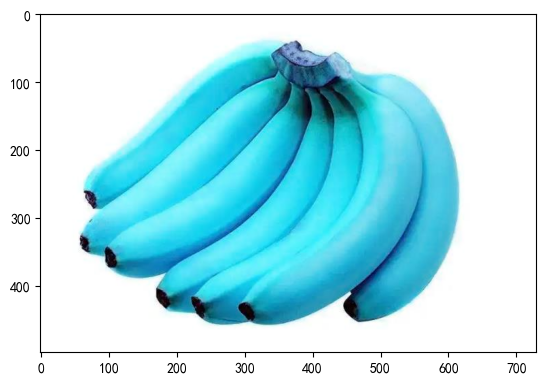

In [87]:
plt.imshow(img1)
plt.show()

In [88]:
result = inferencer('data/predict/1.jpg')[0]

通常，每个样本的结果都是一个字典。比如图像分类的结果是一个包含了 pred_label、pred_score、pred_scores、pred_class 等字段的字典：

In [89]:
print(result['pred_class'])

香蕉


In [90]:
img2=cv2.imread('data/predict/2.jpg')

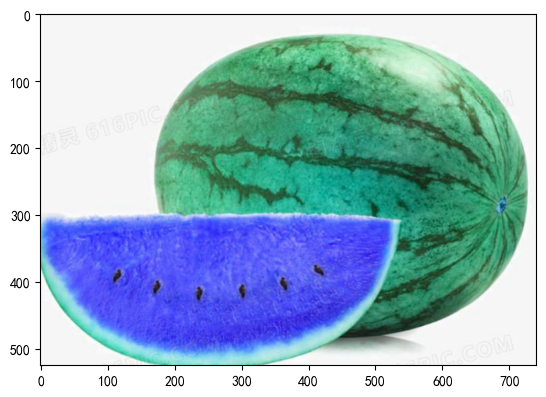

In [91]:
plt.imshow(img2)
plt.show()

In [92]:
result2 = inferencer('data/predict/2.jpg')[0]

In [93]:
print(result2['pred_class'])

西瓜


In [94]:
img3=cv2.imread('data/predict/3.jpg')

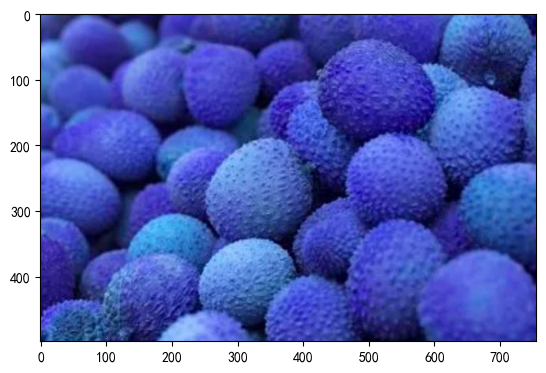

In [95]:
#cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.imshow('image',img3)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img3)
plt.show()

In [96]:
result3 = inferencer('data/predict/3.jpg')[0]

In [97]:
print(result3['pred_class'])

荔枝
